# Introduction to OpenCV
https://docs.opencv.org/4.5.2/da/df6/tutorial_py_table_of_contents_setup.html

In [275]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Morphological Transformations
- learn different morphological operations like Erosion, Dilation, Opening, Closing etc.

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following image:

### cv2.erode()

The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

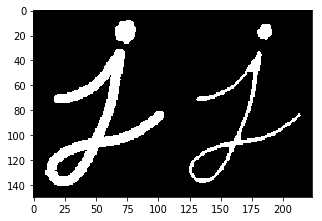

In [160]:
img = cv.imread('j.bmp', 0)

kernel = np.ones((5, 5), np.uint8)
erosion = cv.erode(img, kernel)

plt.figure(figsize=(5, 5))
plt.imshow(np.hstack((img, erosion)), 'gray')

The erode use convolution (so need kernel). can use cv2.getStructuringElement() to get different structure

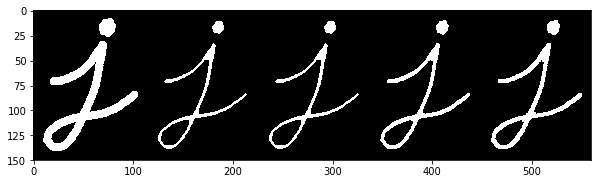

In [168]:
kernel1 = np.ones((5, 5), np.uint8)
erosion1 = cv.erode(img, kernel1)

kernel2 = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
erosion2 = cv.erode(img, kernel2)

kernel3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
erosion3 = cv.erode(img, kernel3)

kernel4 = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))
erosion4 = cv.erode(img, kernel4)

plt.figure(figsize=(10, 20))
plt.imshow(np.hstack((img, erosion1, erosion2, erosion3, erosion4)), 'gray')

### cv2.dilate()

It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. 

Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object. 

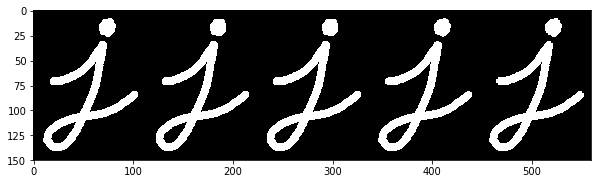

In [172]:
dilation1 = cv.dilate(erosion1, kernel1)
dilation2 = cv.dilate(erosion2, kernel2)
dilation3 = cv.dilate(erosion3, kernel3)
dilation4 = cv.dilate(erosion4, kernel4)

plt.figure(figsize=(10, 20))
plt.imshow(np.hstack((img, dilation1, dilation2, dilation3, dilation4)), 'gray')

### cv2.morphologyEx() : erode + dilate
- Opening - cv2.MORPH_OPEN : erode => dilate
- Closing - cv2.MORPH_CLOSE : dilate => erode

If there are many irrelevant small areas outside our target object, use the open operation to remove them; if there are many small black holes inside the object, use the closed operation to fill them out. 

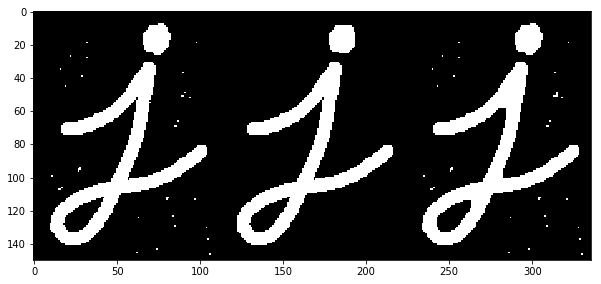

In [174]:
img = cv.imread('j_noise_out.bmp', 0)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 20))
plt.imshow(np.hstack((img, opening, closing)), 'gray')

Others : 
- cv2.MORPH_GRADIENT : dilation - erosion
- cv2.MORPH_TOPHAT : src - opening
- cv2.MORPH_BLACKHAT : closing - src

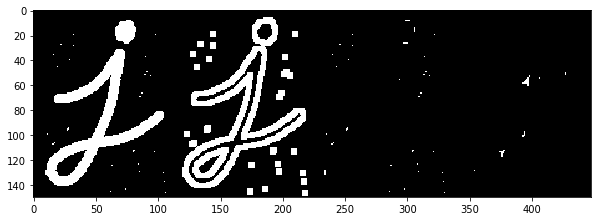

In [176]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(10, 20))
plt.imshow(np.hstack((img, gradient, tophat, blackhat)), 'gray')